# Example Template for HW3

This notebook contains the same template code as "logisticClassify2.py", but reorganized to make it simpler to edit and solve in iPython.  Feel free to use this for your homework, or do it another way, as you prefer.



In [21]:
from __future__ import division

import numpy as np
np.random.seed(0)

import mltools as ml
import sys
sys.path.append('code')

import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
plt.set_cmap('jet');
%matplotlib inline
import warnings
warnings.filterwarnings('ignore'); # for deprecated matplotlib functions

# Problem 1

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y  = ml.shuffleData(X,Y)       # reorder randomly rather than by class label
X,_  = ml.transforms.rescale(X)  # rescale to improve numerical stability, speed convergence

XA, YA = X[Y<2,:], Y[Y<2]        # Dataset A: class 0 vs class 1
XB, YB = X[Y>0,:], Y[Y>0]        # Dataset B: class 1 vs class 2

### Problem 1 - Part 1

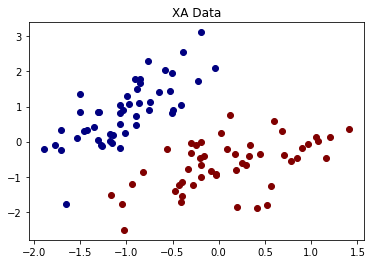

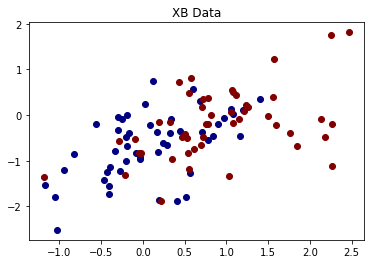

In [3]:
ml.plotClassify2D(None,XA,YA)
plt.title("XA Data")
plt.show()
ml.plotClassify2D(None,XB,YB)
plt.title("XB Data")
plt.show()

##### Data in XA is linearly separable however in XB is not.

### Problem 1 - Part2

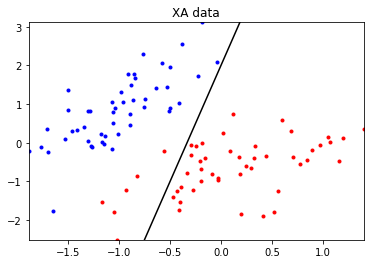

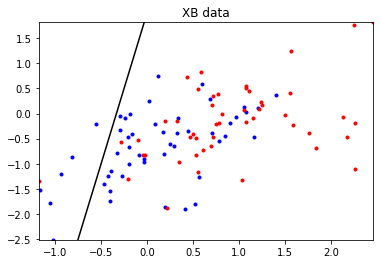

In [4]:
def myPlotBoundary(self, X,Y):
    """ Plot the (linear) decision boundary of the classifier, along with data """
    if len(self.theta) != 3: 
        raise ValueError('Data & model must be 2D')
    ax = X.min(0), X.max(0); 
    ax = (ax[0][0], ax[1][0], ax[0][1], ax[1][1])
    ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
    x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
    x2b = -self.theta[0] / self.theta[2] - (self.theta[1] / self.theta[2]) * x1b     # TODO find x2 values as a function of x1's values
    ## Now plot the data and the resulting boundary:
    A = Y == self.classes[0]; # and plot it:
    plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-') 
    plt.axis(ax) 
    plt.draw()


# Create a shell classifier
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = None                   # these functions will be implemented later
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([2,6,-1])   # TODO: insert hard-coded values
learnerA.plotBoundary(XA, YA)
plt.title("XA data")
plt.show()
learnerA.classes = np.unique(YB)       # store the class values for this problem
#learnerA.theta = np.array([2,6,-1])  # TODO: insert hard-coded values
learnerA.plotBoundary(XB, YB)
plt.title("XB data")
plt.show()

#### Problem 1 - Part3

In [5]:
# Should go in your logistic2 class:
def myPredict(self,X):
    """ Return the predictied class of each data point in X"""
    ## raise NotImplementedError
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
    ar_length = X.shape[0]
    r    = [0] * ar_length
    Yhat = [0] * ar_length
    
    for i in range(0, ar_length):
        r[i] = self.theta[0] + self.theta[1] * X[i,0] + self.theta[2] * X[i,1]
        ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
        if(r[i] > 0):
            Yhat[i] = self.classes[1]
        else:
            Yhat[i] = self.classes[0]
            ## else predict class 0:  Yhat[i] = self.classes[0]
    return np.array(Yhat)


# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([2,6,-1]);  # TODO: insert hard-coded values
print("Error for (XA, YA): ", learnerA.err(XA,YA))

learnerA.classes = np.unique(YB)       # store the class values for this problem
print("Error for (XB, YB): ", learnerA.err(XB,YB))

Error for (XA, YA):  0.06060606060606061
Error for (XB, YB):  0.45454545454545453


### Problem 1 - Part4

##### If predict is implemented, then the inherited 2D visualization function should work; you can verify your decision boundary from P1.2:

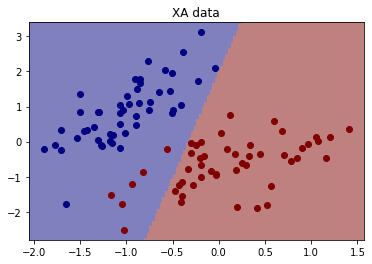

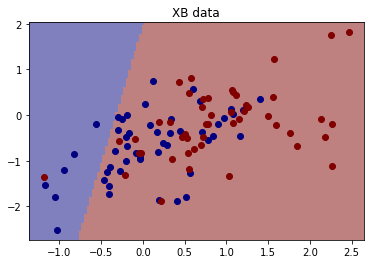

In [6]:
learnerA.classes = np.unique(YA)
ml.plotClassify2D(learnerA,XA,YA)
plt.title("XA data")
plt.show()
learnerA.classes = np.unique(YB)
ml.plotClassify2D(learnerA,XB,YB)
plt.title("XB data")
plt.show()

## ...


Here is an example of latex equations that may be useful for expressing the gradient:

### Prblem 1 - Part 5 
#### Gradient of NLL
Our negative log-likelihood loss is:
$$J_j(\theta) = - \begin{cases} \log( \sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=1 \\ \log(1-\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$

Thus, its gradient is:
$$\nabla J_j(\theta) = (something)$$

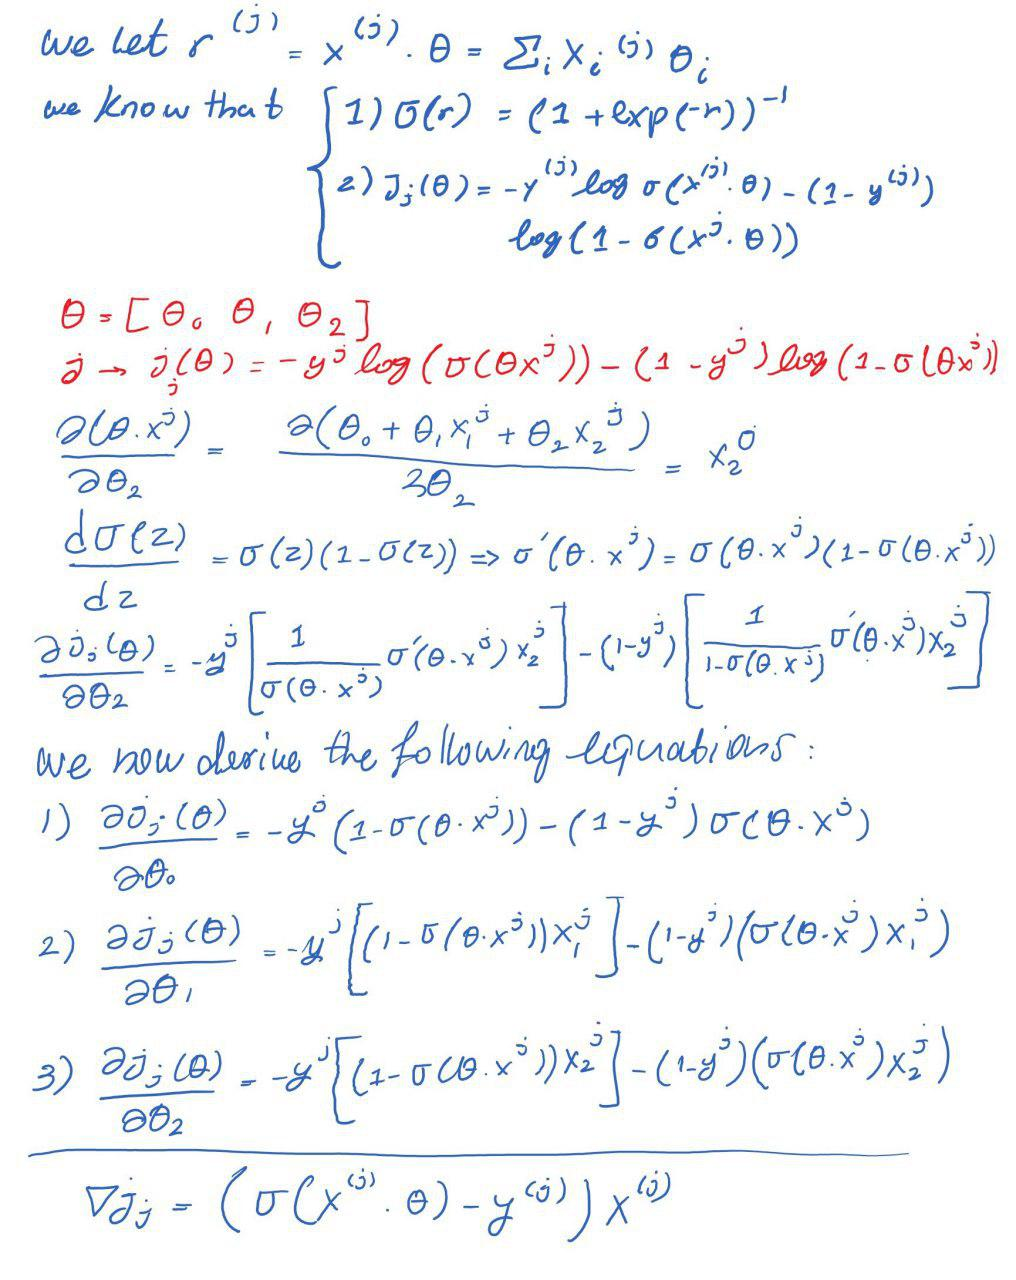

In [80]:
from IPython.display import Image as img
img("p1_5.jpg")

### Problem 1 - Part 6

Now define the train function and complete its missing code.

In [74]:
def myTrain(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    from IPython import display
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    
    if len(self.theta) != N + 1: self.theta = np.random.rand(N + 1);
    # init loop variables:
    epoch = 0; done = False; Jnll = []; J01 = [];
    
    def sigmoid(x):
        return 1 / (1 + math.exp(-x))
    
    while not done:
        stepsize, epoch = initStep * 2.0 / (2.0 + epoch), epoch + 1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri    = 1.0 / (1.0 + np.exp(-(XX[i, :].dot(self.theta))));     # TODO: compute linear response r(x)
            gradi = -YY[i] * (1 - ri) * XX[i, :] + (1 - YY[i]) * ri * XX[i, :];     # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi;  # take a gradient step

        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        
        S_loss = 1.0 / (1.0 + np.exp(-(XX.dot(self.theta))))
        Jnll.append(-np.mean(YY * np.log(S_loss)+(1-YY) * np.log(1-S_loss))) # TODO evaluate the current NLL loss
        display.clear_output(wait = True);
        plt.subplot(1, 2, 1); plt.cla(); plt.plot(Jnll, 'b-', J01, 'r-'); # plot losses
        if N == 2: plt.subplot(1, 2, 2); plt.cla(); self.plotBoundary(X, Y); # & predictor if 2D
        plt.pause(.01);                    # let OS draw the plot        

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        done = (epoch > stopEpochs or (epoch > 1 and np.abs(Jnll[-1] - Jnll[-2]) < stopTol))   # or if Jnll not changing between epochs ( < stopTol )

### Problem 1 - Part 7

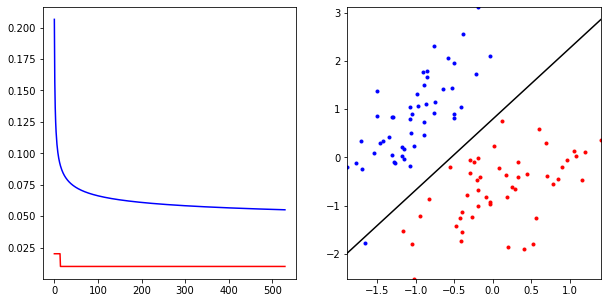

In [66]:
# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              # Now all parts are implemented
    train = myTrain
    
plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
    
learnerA = logisticClassify2()
learnerA.theta = np.array([0., 0., 0.]);
learnerA.train(XA, YA, initStep =1e-1, stopEpochs = 1000, stopTol = 1e-5);

Training error rate:  0.010101010101010102


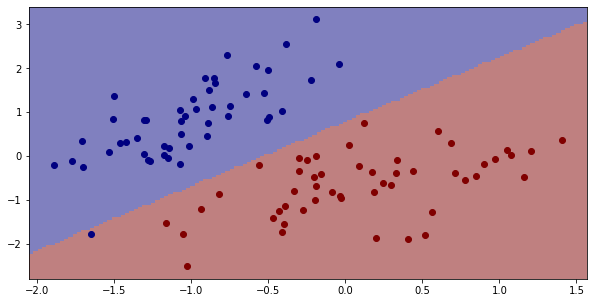

In [67]:
ml.plotClassify2D(learnerA,XA,YA)
print("Training error rate: ", learnerA.err(XA,YA))
plt.show()

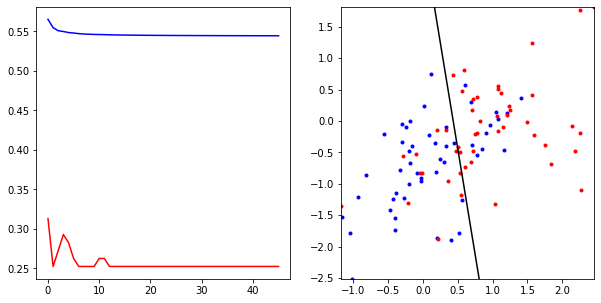

In [77]:
learnerA = logisticClassify2()
learnerA.theta = np.array([0., 0., 0.])
learnerA.train(XB, YB, initStep =1e-1, stopEpochs = 1000, stopTol = 1e-5);

Training error rate:  0.25252525252525254


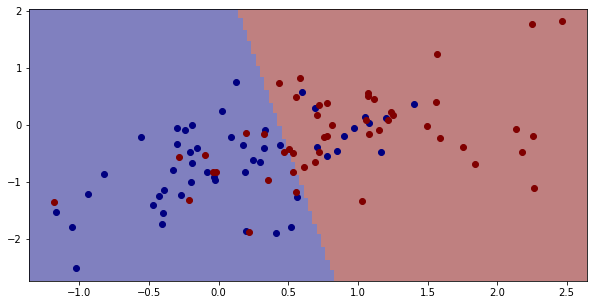

In [83]:
ml.plotClassify2D(learnerA,XB,YB)
print("Training error rate: ", learnerA.err(XB,YB))
plt.show()

# Problem 2

### Problem 2 - Part 1
##### yhat(x) = T(a + bx1):

In this case we can see that, VC dimension = 2. We can calculate this since the degree of the line for this dataset is 1 + 1 = 2.
By solving the equation a + bx1 = 0 for x1, we derive that our boundary line is vertical.
Therefore, in this learner we can only use one feature since we have two parameters.
So we can use this learner on figure "a" and "b".

### Problem 2 - Part 2
##### yhat(x)= T(a + bx1 + cx2):

In this case we can see that, VC dimension = 3. 
We can see this since the boundary line is not crossing from the origin.
In this case for figure d, if we choose points (4, 8) and (6, 4) to be in the same class we can't pick any line to separate them.
Therefore, in this learner we can shatter figures "a", "b", and "c".

### Problem 2 - Part 3
##### yhat(x)= T((x1−a)2 +(x2−b)2 +c):

Since the boundary line for this dataset is a circle positioned at (a, b) which means the center is at (a, b) and radius of c and VC dimension = 3. In here inside the circle will be the class for negative and outside of the circle will be positive. We know this information since the value increases with distance from (a, b) only if c < 0. 
We derive that only figures "a", "b", "c" can be shattered by this learner.
There is another case for figure "d" where if points (2, 2) and (8, 6) are in negative class, and the other points are in the positive class, we can't uses this learner. This is because any circle that has those two points of negative class, will also contain the other two points which are in the positive class.

### Problem 2 - Part 4 (Extra Credit)
##### T( a + bx1 + c x2 ) x T( d + bx1 + c x2 )

Since in the case the boundary line is two parallel lines we can see that VC dimension = 4
Therefor, we can derive that this learner can shatter all the points and it can shatter the points in all figures "a", "b", "c", "d".
Since the lines are parellel it doesn't matter if the boundary lines are vertical or horizontal since they divide the points in three classes.

# Problem 3

For this assignemnt, I mostly used the lecture notes, discussion and Piazza. Piazza and lecture notes were two really helpful resources and I asked questions on Piazza and used my friends help as well.